In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2

In [ ]:
!ls drive/MyDrive/Colab\ Notebooks

'CV & KNN.ipynb'   dogs-vs-cats.zip


In [ ]:
!unzip drive/MyDrive/Colab\ Notebooks/dogs-vs-cats.zip

Archive:  drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

array([[[ 42,  54,  36],
        [ 34,  46,  28],
        [ 33,  44,  28],
        ...,
        [132, 148, 161],
        [132, 148, 161],
        [132, 148, 161]],

       [[ 36,  48,  30],
        [ 30,  42,  24],
        [ 27,  38,  22],
        ...,
        [137, 153, 165],
        [138, 154, 166],
        [139, 155, 167]],

       [[ 39,  50,  34],
        [ 36,  47,  31],
        [ 28,  39,  23],
        ...,
        [136, 151, 160],
        [138, 153, 162],
        [140, 155, 164]],

       ...,

       [[ 96, 116, 141],
        [113, 135, 160],
        [130, 149, 176],
        ...,
        [149, 178, 209],
        [128, 157, 188],
        [121, 150, 181]],

       [[114, 132, 155],
        [123, 144, 166],
        [127, 144, 170],
        ...,
        [139, 168, 199],
        [133, 162, 193],
        [134, 163, 194]],

       [[132, 151, 172],
        [128, 147, 168],
        [119, 136, 162],
        ...,
        [129, 158, 189],
        [145, 174, 205],
        [158, 187, 218]]], dtype=uint8)
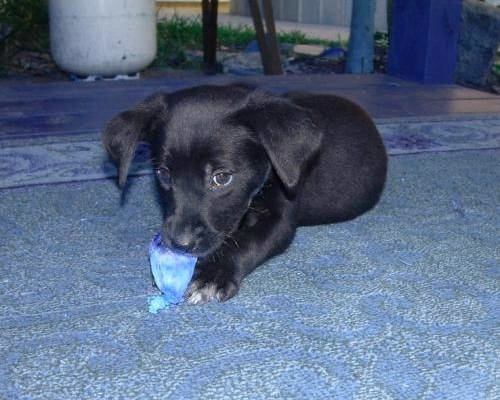

In [ ]:
image = cv2.imread("train/dog.9991.jpg")
image

In [ ]:
from google.colab.patches import cv2_imshow

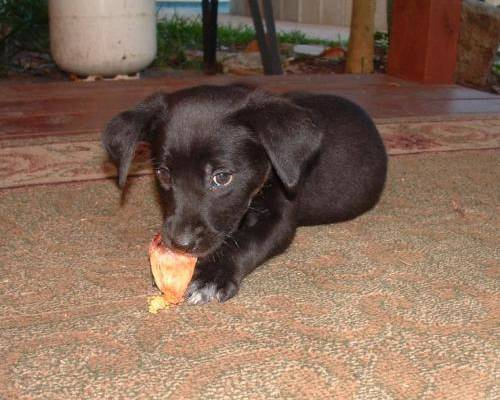

In [ ]:
cv2_imshow(image)

In [ ]:
from sklearn.model_selection import train_test_split
from imutils import paths
import os

In [ ]:
def image_to_features(image, size= (32,32)):
  return cv2.resize(image,size).flatten()

In [ ]:
train_Data = 'train/'

In [ ]:
imagePaths = list(paths.list_images(train_Data))
print(imagePaths[:5])
print(len(imagePaths))

['train/dog.5547.jpg', 'train/dog.5345.jpg', 'train/cat.6170.jpg', 'train/cat.8186.jpg', 'train/dog.4678.jpg']
25000


In [ ]:
import tqdm

In [ ]:
rawImages= []
labels = []
for image_ in tqdm.tqdm(imagePaths):
  image = cv2.imread(image_)
  label = image_.split('/')[1].split('.')[0]

  pixel_values = image_to_features(image)
  rawImages.append(pixel_values)
  labels.append(label)

100%|██████████| 25000/25000 [00:28<00:00, 891.31it/s] 


In [ ]:
rawImages = np.array(rawImages)
labels = np.array(labels)

In [ ]:
rawImages_subset = rawImages[:2000]
labels_subset = labels[:2000]

In [ ]:
(ImageTrain, ImageTest, LabelTrain, LabelTest) = train_test_split(rawImages_subset,labels_subset,test_size = 0.25,shuffle = True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1,3,5,7,11,13]
for i in neighbors:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(ImageTrain,LabelTrain)
  acc = model.score(ImageTest,LabelTest)
  print("Raw pixel accuracy {:.2f}%".format(acc *100))

Raw pixel accuracy 53.00%
Raw pixel accuracy 54.80%
Raw pixel accuracy 59.20%
Raw pixel accuracy 56.40%
Raw pixel accuracy 55.80%
Raw pixel accuracy 57.60%


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(ImageTrain,LabelTrain)

KNeighborsClassifier()

In [ ]:
pred = model.predict(ImageTest)
pred

array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat',
       'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog',
       'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat',
       'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat',
       'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog',
       'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat',
       'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog',
       'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog',
       'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat',
       'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog',
       'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat',
       'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat',
       'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat',
       'cat', 'dog',

In [ ]:
test_plots = ImageTest[:20].reshape((20,32,32,3))

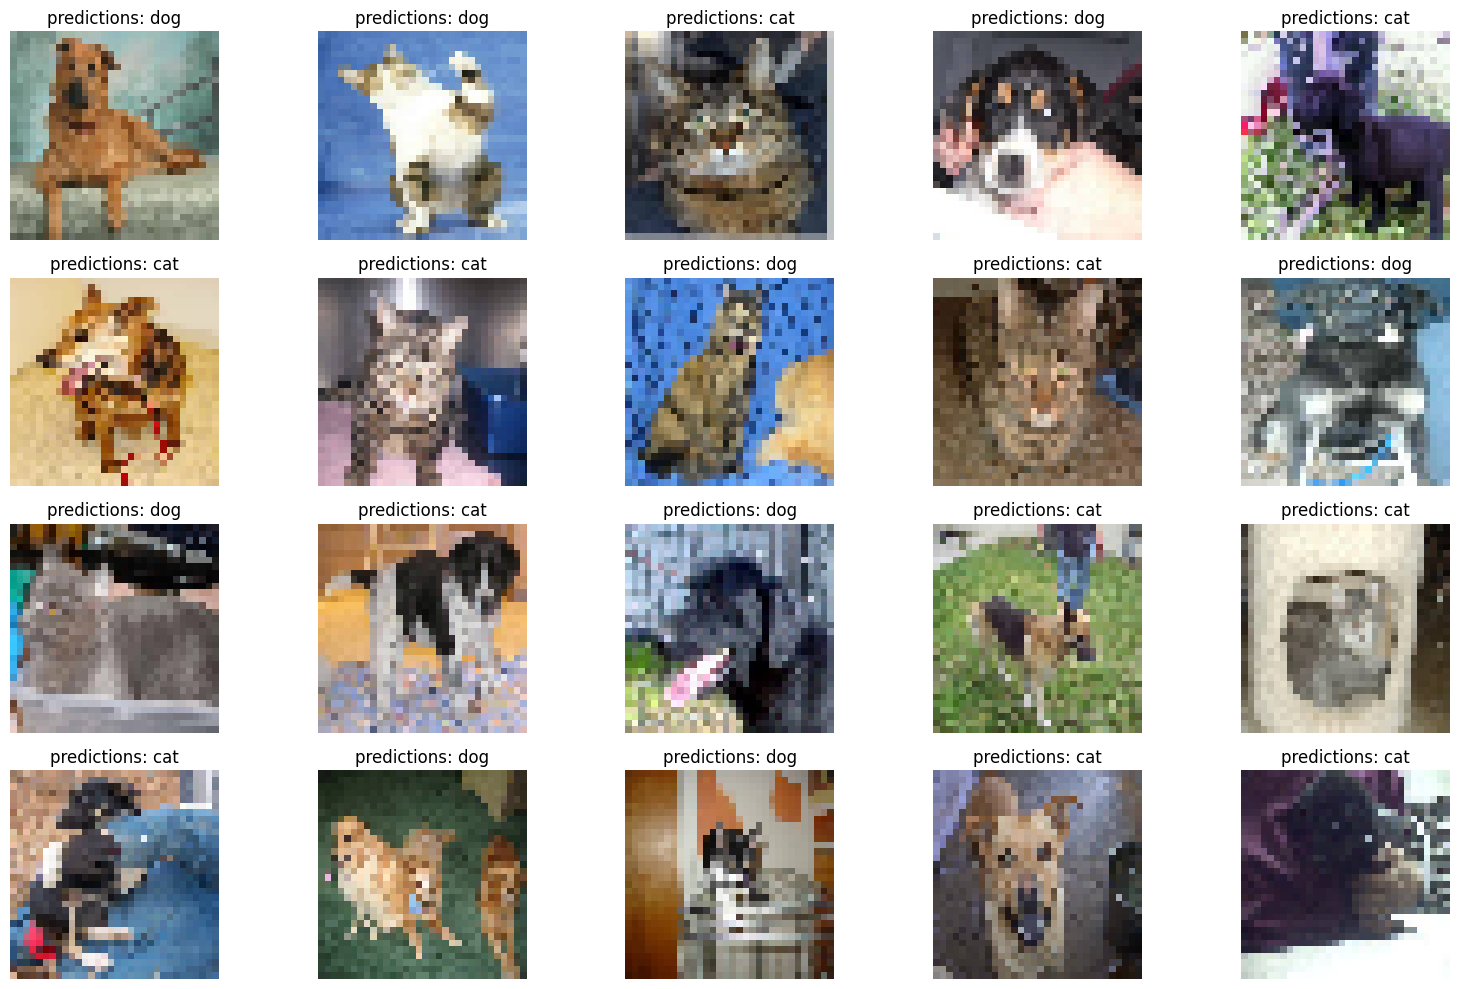

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))
for i,test in enumerate(test_plots):
  plt.subplot(4,5,i+1)
  plt.imshow(cv2.cvtColor(test,cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.title("predictions: "+pred[i])

plt.tight_layout()
plt.show()